In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs  # 
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle
from glob import glob
from netCDF4 import Dataset

# ERA5 PPT

In [2]:

# Load the dataset
data = xr.open_dataset("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/ERA5/ppt2023.nc")
# Define figure and grid layout
fig, axs = plt.subplots(6,1, figsize=(5,20), subplot_kw={'projection': ccrs.PlateCarree()})
title_ax=['i','ii','iii','iv','v','vi']
# Loop over each date (j) and plot in a grid
for idx,i in enumerate(range(15, 21)):
        
    # Choose the time of interest
    time = f"2023-12-{i}"

    # Convert the time to datetime format
    data['time'] = pd.to_datetime(data['time'].values)

    # Select the data for the specific date
    date_data = data.sel(time=time)

    # Replace 'tp' with your variable of interest and convert to mm
    variable = date_data['tp'] * 1000

    # Only keep positive values
    variable = variable.where(variable > 0)

    # Sum all values of the 'tp' variable for the selected time
    total_sum = variable.sum(dim='time')

    # Only show values greater than 20 mm
    total_sum_masked = total_sum.where(total_sum > 0)
        # et lat/lon bounds
    min_lon, max_lon = 74, 83
    min_lat, max_lat = 7, 12.3
    total_sum_masked =total_sum_masked.sel(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))
    # Define shared latitude and longitude ticks
    
    #lon_ticks = range(min_lon, max_lon + 1, 2)
    #lat_ticks = range(int(min_lat), int(max_lat) + 1, 1)

    # Select the subplot within the 2x3 grid
    ax = axs[idx]
    
    # Add features to the map
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor='#F5F5DC')
    ax.add_feature(cfeature.OCEAN, facecolor='#E0FFFF')
    # Set aspect ratio
    ax.set_aspect('auto')  # Change to 'equal' if needed
    # Normalize the color scale
    #norm = Normalize(vmin=total_sum_masked.min().values, vmax=total_sum_masked.max().values)
    norm=[10,50,100,200,300,400,500,600,700]
    # Create filled contours
    contour = ax.contourf(total_sum_masked['longitude'], total_sum_masked['latitude'], 
                        total_sum_masked, levels=norm, cmap='jet', 
                        transform=ccrs.PlateCarree())

    ## Add contour lines
    ax.contour(total_sum_masked['longitude'], total_sum_masked['latitude'], 
            total_sum_masked, levels=norm, colors='black', linewidths=0.5, 
            transform=ccrs.PlateCarree())

    # Create and customize the colorbar
        # Ensure consistent ticks across subplots
    #ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
    #ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
    
    # Add Kayalpattinam location
    longitude=78.1238;latitude=8.5683
    ax.plot(longitude, latitude, 'r*', markersize=8, label='Kayalpattinam (8.568$\circ$N, 78.124$\circ$E)', transform=ccrs.PlateCarree())

    # Add gridlines
    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.1, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels= idx == len(range(15, 21)) - 1  # Enable x-ticks for the last subplot
    gl.left_labels= True
            # Apply opacity to y-axis labels
    
    # Manually set left labels
    gl.ylabel_style = {'fontsize': 9, 'alpha': 0.7}
    
        # Only show x-ticks on the last plot
    #if idx == len(range(15, 21))-1:
     #   gl.xlabel_style = {'fontsize': 9,'alpha': 0.7}

    # Title for each subplot
    ax.set_title(f'({title_ax[idx]}) {time}', fontsize=10, fontweight='bold')

# Position for colorbar
fig.colorbar(contour, ax=axs,orientation='horizontal',pad=0.02, label='ERA5 Total Precipitation (mm)')

plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/PPT_ERA5.png",dpi=300,bbox_inches='tight')
plt.close()


# IMDAA PPT

In [3]:

# Load the dataset
data = xr.open_dataset("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/IMDAA/T_PRECIP/ncum_imdaa_reanl_HR_APCP-sfc_2023121500-2023122123.nc")
# Define figure and grid layout
fig, axs = plt.subplots(6,1, figsize=(5,20), subplot_kw={'projection': ccrs.PlateCarree()})
title_ax=['i','ii','iii','iv','v','vi']
# Loop over each date (j) and plot in a grid
for idx,i in enumerate(range(15, 21)):
        
    # Choose the time of interest
    time = f"2023-12-{i}"

    # Convert the time to datetime format
    data['time'] = pd.to_datetime(data['time'].values)

    # Select the data for the specific date and resample to daily PPT and Accumulated PPT
    date_data = data.sel(time=time)['APCP_sfc'].resample(time="D").sum()[0]
    date_data=date_data.where(date_data>1)

    # Set lat/lon bounds
    min_lon, max_lon = 74, 83
    min_lat, max_lat = 7, 12.3
    anomaly_ppt =date_data.sel(latitude=slice(min_lat, max_lat), longitude=slice(min_lon, max_lon))

    # Select the subplot within the 2x3 grid
    ax = axs[idx]
    
    # Add features to the map
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor='#F5F5DC')
    ax.add_feature(cfeature.OCEAN, facecolor='#E0FFFF')
    # Set aspect ratio
    ax.set_aspect('auto')  # Change to 'equal' if needed
    # Normalize the color scale
    #norm = Normalize(vmin=anomaly_ppt.min().values, vmax=anomaly_ppt.max().values)
    norm=[10,50,100,200,300,400,500,600,700]
    # Create filled contours
    contour = ax.contourf(anomaly_ppt['longitude'], anomaly_ppt['latitude'], 
                        anomaly_ppt, levels=norm, cmap='jet', 
                        transform=ccrs.PlateCarree())

    ## Add contour lines
    ax.contour(anomaly_ppt['longitude'], anomaly_ppt['latitude'], 
            anomaly_ppt, levels=norm, colors='black', linewidths=0.5, 
            transform=ccrs.PlateCarree())

    # Create and customize the colorbar
    #cbar = plt.colorbar(contour, ax=ax, orientation='vertical')
    #cbar.set_label('Total Precipitation (mm)')
    lon_min, lon_max = 76, 80
    lat_min, lat_max = 8, 12
    box = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                    edgecolor='red', facecolor='none', linewidth=2, transform=ccrs.PlateCarree())
    #ax.add_patch(box)
    # Add Kayalpattinam location
    longitude=78.1238;latitude=8.5683
    ax.plot(longitude, latitude, 'r*', markersize=8, label='Kayalpattinam (8.568$\circ$N, 78.124$\circ$E)', transform=ccrs.PlateCarree())
    # Add gridlines
    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.1, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels=idx == len(range(15, 21))-1  # Enable x-ticks for the last subplot
    gl.left_labels=True
            # Apply opacity to y-axis labels
    
    # Manually set left labels
    gl.ylabel_style = {'fontsize': 9, 'alpha': 0.7}
    gl.xlabel_style = {'fontsize': 9,'alpha': 0.7}
        # Only show x-ticks on the last plot
        
    # Title for each subplot
    ax.set_title(f'({title_ax[idx]}) {time}', fontsize=10, fontweight='bold')

# Position for colorbar
fig.colorbar(contour, ax=axs,orientation='horizontal',pad=0.02, label='IMDAA Total Precipitation (mm)')

plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/PPT_IMDAA.png",dpi=300,bbox_inches='tight')
plt.close(fig)


# PPT Actual IMD Gridded Dataset

In [4]:
df=pd.read_csv("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/Rainfall_SP_1951_2023.csv")
lat_lon=df[['lat','lon']]
df=df.drop(['lat','lon'],axis=1)
df.columns=pd.to_datetime(df.columns)
dates=[]
coords=[]
for i in range(15,21):
    epe=df.T[df.T.index==f'2023-12-{i}'].T
    epe.columns=['PPT'] 
    epe['lat']=lat_lon['lat'] 
    epe['lon']=lat_lon['lon']
    coords.append(epe.groupby(['lon', 'lat']).sum().reset_index().pivot(index='lat', columns='lon', values='PPT'))
    dates.append(f"2023-12-{i}")
title_ax=['i','ii','iii','iv','v','vi']
import geopandas as gpd
fig, axes = plt.subplots(6,1, figsize=(5,20), subplot_kw={'projection': ccrs.PlateCarree()})
ims = []  # Store the mappable objects

for i, ax in enumerate(axes.flat):
    norm=[10,50,100,200,300,400,500,600,700]
        # Set lat/lon bounds
    min_lon, max_lon = 74, 83
    min_lat, max_lat = 7, 12.3
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor='#F5F5DC')
    ax.add_feature(cfeature.OCEAN, facecolor='#E0FFFF')
    # Set aspect ratio
    ax.set_aspect('auto')  # Change to 'equal' if needed
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

    contour = ax.contourf(coords[i].columns, coords[i].index, coords[i].values, levels=norm, cmap='jet',transform=ccrs.PlateCarree())
    ax.plot(longitude, latitude, 'r*', markersize=8, label='Kayalpattinam (8.568$\circ$N, 78.124$\circ$E)', transform=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.1, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels=i== len(range(15, 21)) - 1  # Enable x-ticks for the last subplot
    gl.left_labels=True
            # Apply opacity to y-axis labels
    
    # Manually set left labels
    gl.ylabel_style = {'fontsize': 9, 'alpha': 0.7}
    gl.xlabel_style = {'fontsize': 9,'alpha': 0.7}
        # Only show x-ticks on the last plot
    # Title for each subplot
    ax.set_title(f"({title_ax[i]}) {dates[i]}", fontsize=10, fontweight='bold')
# Create a shared colorbar for all contour plots
# Combine all the data to create a single mappable object for the colorbar
# Position for colorbar
fig.colorbar(contour, ax=axes,orientation='horizontal',pad=0.02, label='IMD Total Precipitation (mm)')
plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/PPT_IMD.png",dpi=300,bbox_inches='tight')
plt.close(fig)

# Return Period Plots

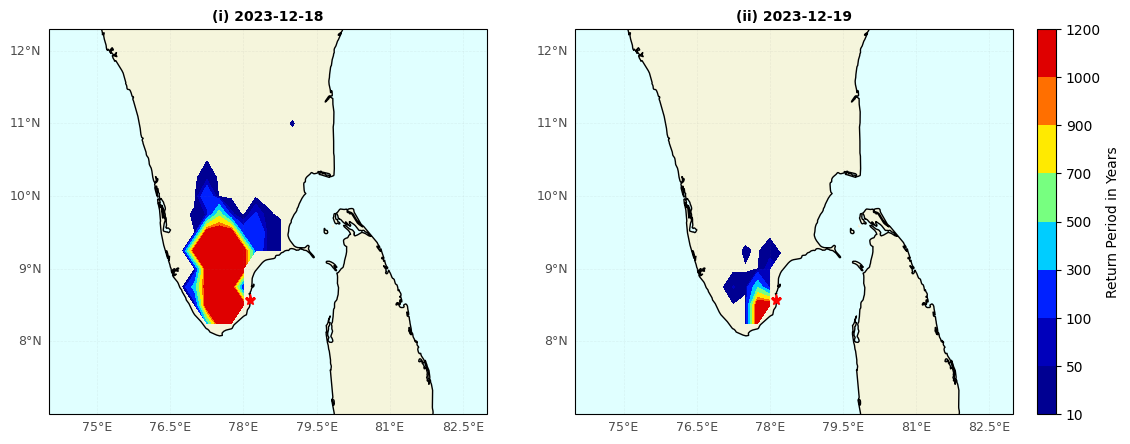

In [5]:
df=pd.read_csv("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/Return_Periods.csv")
lat_lon=df[['lat','lon']]
df=df.drop(['lat','lon'],axis=1)
df.columns=pd.to_datetime(df.columns)
dates=[]
coords=[]
for i in range(18,20):
    epe=df.T[df.T.index==f'2023-12-{i}'].T
    epe.columns=['PPT'] 
    epe['lat']=lat_lon['lat'] 
    epe['lon']=lat_lon['lon']
    coords.append(epe.groupby(['lon', 'lat']).sum().reset_index().pivot(index='lat', columns='lon', values='PPT'))
    dates.append(f"2023-12-{i}")

import geopandas as gpd
fig, axes = plt.subplots(1,2, figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree()})
ims = []  # Store the mappable objects
labels=['i','ii']
for i, ax in enumerate(axes[:3].flat):
    norm=[10,50,100,300,500,700,900,1000,1200]
        # Set lat/lon bounds
    min_lon, max_lon = 74, 83
    min_lat, max_lat = 7, 12.3
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor='#F5F5DC')
    ax.add_feature(cfeature.OCEAN, facecolor='#E0FFFF')
    # Set aspect ratio
    ax.set_aspect('auto')  # Change to 'equal' if needed
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

    contour = ax.contourf(coords[i].columns, coords[i].index, coords[i].values, levels=norm, cmap='jet',transform=ccrs.PlateCarree())
    ax.plot(longitude, latitude, 'r*', markersize=8, label='Kayalpattinam (8.568$\circ$N, 78.124$\circ$E)', transform=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.1, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels=True
    gl.left_labels=True
            # Apply opacity to y-axis labels
    
    # Manually set left labels
    gl.ylabel_style = {'fontsize': 9, 'alpha': 0.7}

    gl.xlabel_style = {'fontsize': 9,'alpha': 0.7}

    # Title for each subplot
    ax.set_title(f"({labels[i]}) {dates[i]}", fontsize=10, fontweight='bold')
# Create a shared colorbar for all contour plots
# Combine all the data to create a single mappable object for the colorbar
# Position for colorbar
fig.colorbar(contour, ax=axes,orientation='vertical',pad=0.02, label='Return Period in Years')
plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/PPT_IMD_Return_Periods.png",dpi=500,bbox_inches='tight')

# Anomaly Plots: PPT

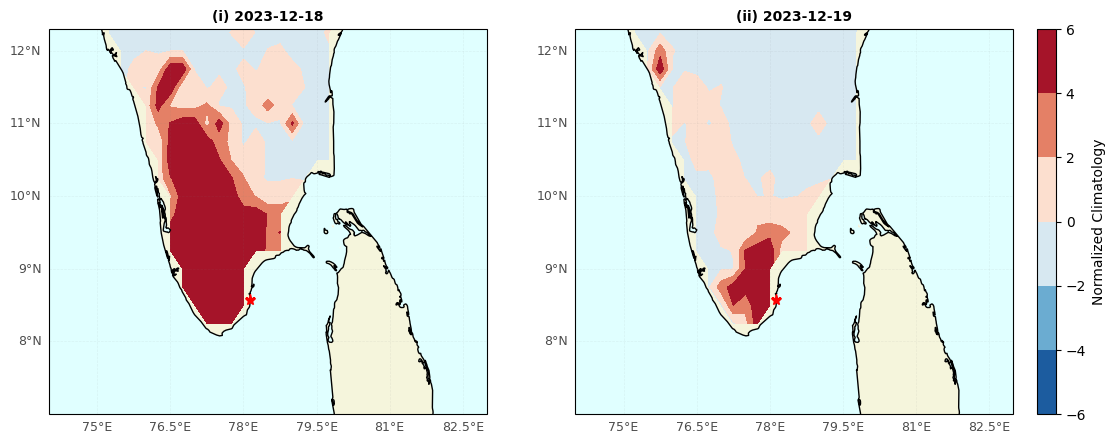

In [6]:
df=pd.read_csv("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/Rainfall_SP_1951_2023.csv")
lat_lon=df[['lat','lon']]
df=df.drop(['lat','lon'],axis=1)
df.columns=pd.to_datetime(df.columns)
df1=df.T[df.T.index.year>=1991].T
# Define the start and end years
start_year = 1991
end_year = 2023

# Define the specific day and month to extract (e.g., January 15th)

day = [18,19]
month = 12
coords=[];date_list=[]
for i in day:
    # Create a list of dates for that day and month across all years
    dates = pd.to_datetime([f'{year}-{month:02d}-{i:02d}' for year in range(start_year, end_year + 1)])

    df1=df.T[df.T.index.isin(dates)]
    mean_val=pd.DataFrame(df1.mean(),columns=['mean'])
    std_val=pd.DataFrame(df1.std(),columns=['std'])
    df_event=df.T[df.T.index==f'2023-12-{i}'].T
    anom=(df_event[f'2023-12-{i}']-mean_val['mean'])/std_val['std']
    # For Contourf PLot
    coords_df = pd.DataFrame([lat_lon['lon'], lat_lon['lat']]).T
    coords_df.columns = ['lon', 'lat']
    coords_df['value'] = anom.values.astype(float)
    coords.append(coords_df.groupby(['lon', 'lat']).sum().reset_index().pivot(index='lat', columns='lon', values='value'))
    date_list.append(f"2023-12-{i}")
    
import geopandas as gpd
fig, axes = plt.subplots(1,2, figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree()})
ims = []  # Store the mappable objects
labels=['i','ii']
for i, ax in enumerate(axes[:3].flat):
    norm=[-6,-4,-2,0,2,4,6]
        # Set lat/lon bounds
    min_lon, max_lon = 74, 83
    min_lat, max_lat = 7, 12.3
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor='#F5F5DC')
    ax.add_feature(cfeature.OCEAN, facecolor='#E0FFFF')
    # Set aspect ratio
    ax.set_aspect('auto')  # Change to 'equal' if needed
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

    contour = ax.contourf(coords[i].columns, coords[i].index, coords[i].values,
                           levels=norm, cmap='RdBu_r',transform=ccrs.PlateCarree())
    ax.plot(longitude, latitude, 'r*', markersize=8, label='Kayalpattinam (8.568$\circ$N, 78.124$\circ$E)', transform=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.1, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels=True
    gl.left_labels=True
            # Apply opacity to y-axis labels
    
    # Manually set left labels
    gl.ylabel_style = {'fontsize': 9, 'alpha': 0.7}

    gl.xlabel_style = {'fontsize': 9,'alpha': 0.7}

    # Title for each subplot
    ax.set_title(f"({labels[i]}) {date_list[i]}", fontsize=10, fontweight='bold')
# Create a shared colorbar for all contour plots
# Combine all the data to create a single mappable object for the colorbar
# Position for colorbar
fig.colorbar(contour, ax=axes,orientation='vertical',pad=0.02, label='Normalized Climatology')
plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/PPT_IMD_Climatology.png",dpi=300,bbox_inches='tight')

# IVT ERA5


### Function


In [7]:

def IVT_calculation(q,u,v,level):
    p_levels=u.sel(pressure_level=slice(1001,level))['pressure_level'] 
    # slicing params till the value
    q1=q.sel(pressure_level=slice(1001,level)).fillna(0) 
    u1=u.sel(pressure_level=slice(1001,level)).fillna(0)
    v1=v.sel(pressure_level=slice(1001,level)).fillna(0)
    # Compute u*q and v*q
    u_q=q1*u1
    v_q=q1*v1
    
    # To Ensure that hPa is converted to kg/ms^2 
    dp =np.abs(p_levels.diff(dim='pressure_level'))*100 
    # Adjust dp to align with the variable dimensions
    dp = dp.broadcast_like(u_q)
    ivt_u = ((u_q * dp)/9.81).sum(dim='pressure_level')  # Divide by g (9.81 m/s²)

    ivt_v = ((v_q * dp)/9.81).sum(dim='pressure_level')  # Divide by g(9.81 m/s²)
    ivt = np.sqrt(ivt_u**2 + ivt_v**2)
    return ivt,q1,u1,v1


# ERA5 at Various Pressures

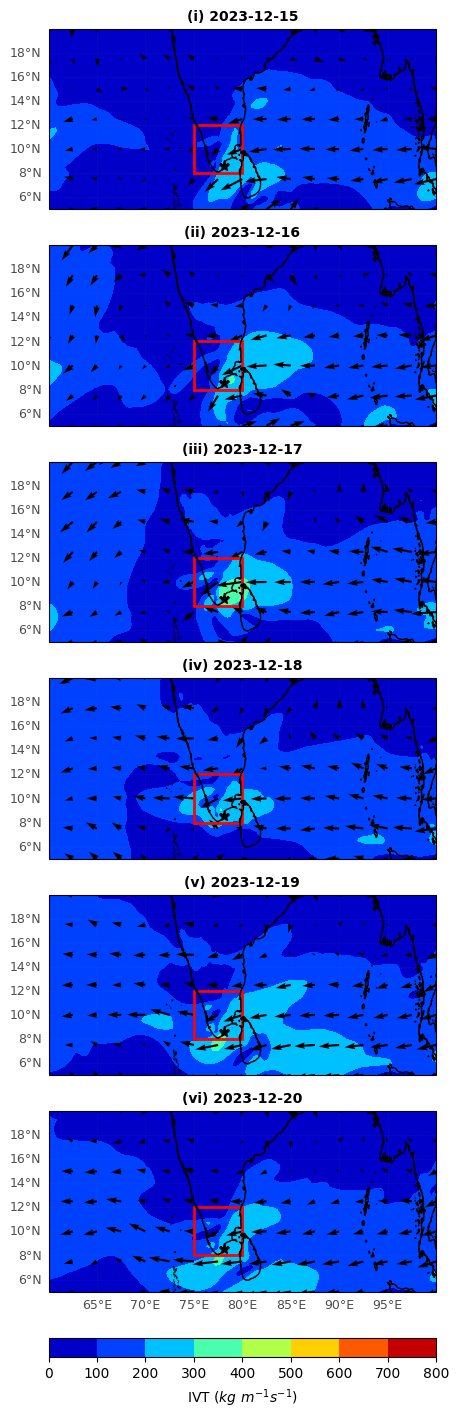

In [8]:
height=850
data = xr.open_dataset("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/data/ERA5/area_averaged.nc")
g=9.81 #m/s
data['valid_time'] = pd.to_datetime(data['valid_time'].values)  # Convert to datetime format
min_lon, max_lon = 60,100
min_lat, max_lat = 5, 20
 #Selecting the parameters for the IVT
date_data = data.sel(latitude=slice(max_lat, min_lat),
                    longitude=slice(min_lon, max_lon)
                    )[['q','u','v']].resample(valid_time="D").mean()
# ivt Calaculation
ivt,q1,u1,v1=IVT_calculation(q=date_data['q'],u=date_data['u'],v=date_data['v'],level=height)

# Extract the specific pressure level
u_flux=date_data['u'].sel(pressure_level=height)
v_flux=date_data['v'].sel(pressure_level=height)

# Reset the dataset for the specifc pressure level
date_data_1 = xr.Dataset(
    {
    "ivt": (("valid_time",  "latitude", "longitude"), ivt.values),  # IVT in kg/m s
    "u": (("valid_time",  "latitude", "longitude"), u_flux.values),  # Zonal wind in m/s
    "v": (("valid_time",  "latitude", "longitude"), v_flux.values),  # Meridional wind in m/s
    },
    coords=ivt.coords)

# Plotting

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(6,1, figsize=(5,20), subplot_kw={'projection': ccrs.PlateCarree()})

# Flatten the axes array for easy indexing
#axes = axes.flatten()
labels=['i','ii','iii','iv','v','vi']
# Loop over the time range you want to plot
for idx, i in enumerate(range(15, 21)):
    time = f'2023-12-{i}'
    
    # Extract the relevant data for IVT and wind components (u and v)
    ivt_masked = date_data_1.isel(valid_time=idx)['ivt']
    u_flux_masked = date_data_1.isel(valid_time=idx)['u']
    v_flux_masked = date_data_1.isel(valid_time=idx)['v']

    # Use the corresponding subplot axis
    ax = axes[idx]

    # Set up coastlines, land, and ocean features
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor='#F5F5DC')
    ax.add_feature(cfeature.OCEAN, facecolor='#E0FFFF')
    
    # Set aspect ratio
    ax.set_aspect('auto')  # Change to 'equal' if needed

    # Normalize and plot contours
    norm = np.arange(0,900,100)
    contour = ax.contourf(ivt_masked['longitude'], ivt_masked['latitude'], ivt_masked, 
                           cmap='jet', levels=norm, transform=ccrs.PlateCarree())

    # Add quivers for wind direction and strength
    quiver_stride = 10
    ax.quiver(u_flux_masked.longitude[::quiver_stride], u_flux_masked.latitude[::quiver_stride],
              u_flux_masked[::quiver_stride, ::quiver_stride], 
              v_flux_masked[::quiver_stride, ::quiver_stride],
              scale=200, color='black', transform=ccrs.PlateCarree())

    # Define coordinates and size for the square box
    lon_min, lon_max = 75, 80
    lat_min, lat_max = 8, 12
    box = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                    edgecolor='red', facecolor='none', linewidth=2, transform=ccrs.PlateCarree())
    ax.add_patch(box)

    # Add Kayalpattinam location
    longitude = 78.1238
    latitude = 8.5683
    ax.plot(longitude, latitude, 'black', marker='*', markersize=8, label='Kayalpattinam (8.568$\circ$N, 78.124$\circ$E)', transform=ccrs.PlateCarree())

    # Add gridlines
    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.1, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = False
    gl.left_labels = True

    # Apply opacity to y-axis labels
    gl.ylabel_style = {'fontsize': 9, 'alpha': 0.7}

    # Only show x-ticks on the last plot
    if idx == len(range(15, 21))-1:
        gl.bottom_labels=True  # Enable x-ticks on the top of the last plot
        gl.xlabel_style = {'fontsize': 9,'alpha': 0.7}
    else:
        gl.bottom_labels=False  # Disable x-ticks on all other plots

    # Title for each subplot
    ax.set_title(f'({labels[idx]}) {time}', fontsize=10, fontweight='bold')

# Add a common colorbar
cbar = fig.colorbar(contour, ax=axes, orientation='horizontal', 
                    label="IVT ($kg~m^{-1}s^{-1}$)", pad=0.03)

# Adjust layout to fit colorbar
plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/ERA5_IVT_850.png",dpi=300,bbox_inches='tight')


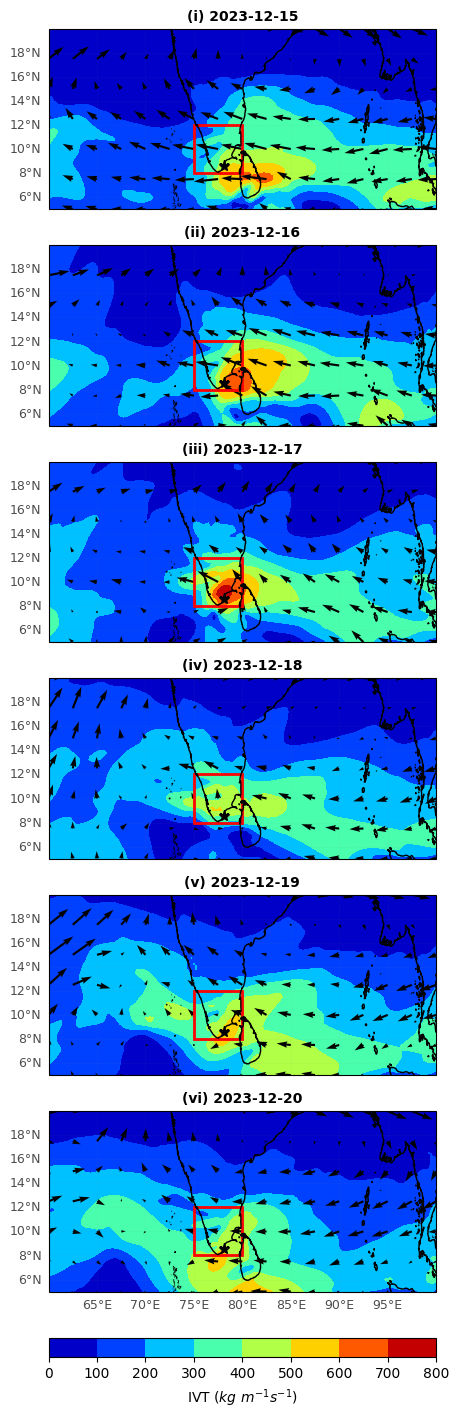

In [9]:
height=500
data = xr.open_dataset("C://Users/sreega/Desktop/Workstation/EPE_Identification/decEPE/area_averaged.nc")
g=9.81 #m/s
data['valid_time'] = pd.to_datetime(data['valid_time'].values)  # Convert to datetime format
min_lon, max_lon = 60,100
min_lat, max_lat = 5, 20
 #Selecting the parameters for the IVT
date_data = data.sel(latitude=slice(max_lat, min_lat),
                    longitude=slice(min_lon, max_lon)
                    )[['q','u','v']].resample(valid_time="D").mean()
# ivt Calaculation
ivt,q1,u1,v1=IVT_calculation(q=date_data['q'],u=date_data['u'],v=date_data['v'],level=height)

# Extract the specific pressure level
u_flux=date_data['u'].sel(pressure_level=height)
v_flux=date_data['v'].sel(pressure_level=height)

# Reset the dataset for the specifc pressure level
date_data_1 = xr.Dataset(
    {
    "ivt": (("valid_time",  "latitude", "longitude"), ivt.values),  # IVT in kg/m s
    "u": (("valid_time",  "latitude", "longitude"), u_flux.values),  # Zonal wind in m/s
    "v": (("valid_time",  "latitude", "longitude"), v_flux.values),  # Meridional wind in m/s
    },
    coords=ivt.coords,)

# Plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(6,1, figsize=(5,20), subplot_kw={'projection': ccrs.PlateCarree()})

# Flatten the axes array for easy indexing
#axes = axes.flatten()
labels=['i','ii','iii','iv','v','vi']
# Loop over the time range you want to plot
for idx, i in enumerate(range(15, 21)):
    time = f'2023-12-{i}'
    
    # Extract the relevant data for IVT and wind components (u and v)
    ivt_masked = date_data_1.isel(valid_time=idx)['ivt']
    u_flux_masked = date_data_1.isel(valid_time=idx)['u']
    v_flux_masked = date_data_1.isel(valid_time=idx)['v']

    # Use the corresponding subplot axis
    ax = axes[idx]

    # Set up coastlines, land, and ocean features
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor='#F5F5DC')
    ax.add_feature(cfeature.OCEAN, facecolor='#E0FFFF')
    
    # Set aspect ratio
    ax.set_aspect('auto')  # Change to 'equal' if needed

    # Normalize and plot contours
    norm = np.arange(0,900,100)
    contour = ax.contourf(ivt_masked['longitude'], ivt_masked['latitude'], ivt_masked, 
                           cmap='jet', levels=norm, transform=ccrs.PlateCarree())

    # Add quivers for wind direction and strength
    quiver_stride = 10
    ax.quiver(u_flux_masked.longitude[::quiver_stride], u_flux_masked.latitude[::quiver_stride],
              u_flux_masked[::quiver_stride, ::quiver_stride], 
              v_flux_masked[::quiver_stride, ::quiver_stride],
              scale=200, color='black', transform=ccrs.PlateCarree())

    # Define coordinates and size for the square box
    lon_min, lon_max = 75, 80
    lat_min, lat_max = 8, 12
    box = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                    edgecolor='red', facecolor='none', linewidth=2, transform=ccrs.PlateCarree())
    ax.add_patch(box)

    # Add Kayalpattinam location
    longitude = 78.1238
    latitude = 8.5683
    ax.plot(longitude, latitude, 'black',marker='*', markersize=8, label='Kayalpattinam (8.568$\circ$N, 78.124$\circ$E)', transform=ccrs.PlateCarree())

    # Add gridlines
    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.1, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = False
    gl.left_labels = True

    # Apply opacity to y-axis labels
    gl.ylabel_style = {'fontsize': 9, 'alpha': 0.7}

        # Only show x-ticks on the last plot
    if idx == len(range(15, 21))-1:
        gl.bottom_labels=True  # Enable x-ticks on the top of the last plot
        gl.xlabel_style = {'fontsize': 9,'alpha': 0.7}
    else:
        gl.bottom_labels=False  # Disable x-ticks on all other plots
    # Title for each subplot
    ax.set_title(f'({labels[idx]}) {time}', fontsize=10, fontweight='bold')

# Add a common colorbar
cbar = fig.colorbar(contour, ax=axes, orientation='horizontal', 
                    label="IVT ($kg~m^{-1}s^{-1}$)", pad=0.03)

# Adjust layout to fit colorbar
plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/ERA5_IVT_500.png",dpi=300,bbox_inches='tight')


# IMDAA IVT

# 850


In [10]:
def IVT_calculation_IMDAA(q,u,v,height):
    p_levels=u.sel(plevel=slice(1001,height))['plevel'] 
    # slicing params till the value
    q1=q.sel(plevel=slice(1001,height)).fillna(0) 
    u1=u.sel(plevel=slice(1001,height)).fillna(0)
    v1=v.sel(plevel=slice(1001,height)).fillna(0)
    # Convert it to dataframe to avoid problems with dims
    q2=q1.to_dataframe().reset_index()
    u2=u1.to_dataframe().reset_index()
    v2=v1.to_dataframe().reset_index()
    # Compute u*q and v*q
    uq=q2['sph']*u2['UGRD_prl']
    vq=q2['sph']*v2['VGRD_prl']

    shape_array=tuple(dict(u1.sizes.items()).values())
    # Compute the IVT by multiplying u*v
    u_q=xr.DataArray(np.array(uq).reshape(shape_array),dims=q.dims, coords=q.coords,name='U_q')
    v_q=xr.DataArray(np.array(vq).reshape(shape_array),dims=q.dims, coords=q.coords,name='V_q')

    # To Ensure that hPa is converted to kg/ms^2 
    dp =np.abs(p_levels.diff(dim='plevel'))*100 
    # Adjust dp to align with the variable dimensions
    dp = dp.broadcast_like(u_q)
    ivt_u = (u_q * dp).sum(dim='plevel')  # Divide by g (9.81 m/s²)

    ivt_v = (v_q * dp).sum(dim='plevel')  # Divide by g(9.81 m/s²)
    ivt = np.sqrt((ivt_u/9.81)**2 + (ivt_v/9.81)**2)
    return ivt,q1,u1,v1
from glob import glob
sph_files=sorted(glob('C://Users/sreega/Desktop/Workstation/EPE_Identification/decEPE/IMDAA/data/SPH_Scaled/*2023.nc'))
u_files=sorted(glob('C://Users/sreega/Desktop/Workstation/EPE_Identification/decEPE/IMDAA/data/U/*2023*.nc'))
v_files=sorted(glob('C://Users/sreega/Desktop/Workstation/EPE_Identification/decEPE/IMDAA/data/V/*2023*.nc'))

height=850

# Process 'sph' data
q_path=sph_files[0]
u_path=u_files[0]
v_path=v_files[0]
# Read the specific humidity
sph_data = xr.open_dataset(q_path)
sph_data['time'] = pd.to_datetime(sph_data['time'].values)
# Selcting only specific pressure levels
q = (sph_data.sel(lev=slice(1001, height)).rename({"lev": "plevel"})['sph']).resample(time="D").mean()

# Process UGRD data (zonal wind component)
data = xr.open_dataset(u_path)
# Sort data by pressure level in descending order
data_sorted = data.sortby('plevel', ascending=False)
# Select pressure levels that match the specific humidity levels (q['plevel'])
u = data_sorted.sel(plevel=slice(1000,height)).isel(plevel=[0,1,3]).resample(time="D").mean()

# Process UGRD data (zonal wind component)
data = xr.open_dataset(v_path)
# Sort data by pressure level in descending order
data_sorted = data.sortby('plevel', ascending=False)
# Select pressure levels that match the specific humidity levels (q['plevel'])
v = data_sorted.sel(plevel=slice(1000,height)).isel(plevel=[0,1,3]).resample(time="D").mean()

ivt,q1,u1,v1=IVT_calculation_IMDAA(q,u,v,height=height) # change the level to various levels required
# Extract the specific pressure level
u_flux=u1['UGRD_prl'].sel(plevel=height)
v_flux=v1['VGRD_prl'].sel(plevel=height)
# Reset the dataset for the specifc pressure level
date_data_1 = xr.Dataset(
    {
    "ivt": (("time",  "latitude", "longitude"), ivt.values),  # IVT in kg/m s
    "u": (("time",  "latitude", "longitude"), u_flux.values),  # Zonal wind in m/s
    "v": (("time",  "latitude", "longitude"), v_flux.values),  # Meridional wind in m/s
    },
    coords=ivt.coords)

# Set the Coordinates
min_lon, max_lon = 60,100
min_lat, max_lat = 5, 20

 #Selecting the parameters for the IVT
date_data_1 = date_data_1.sel(latitude=slice(min_lat, max_lat),
                    longitude=slice(min_lon, max_lon))


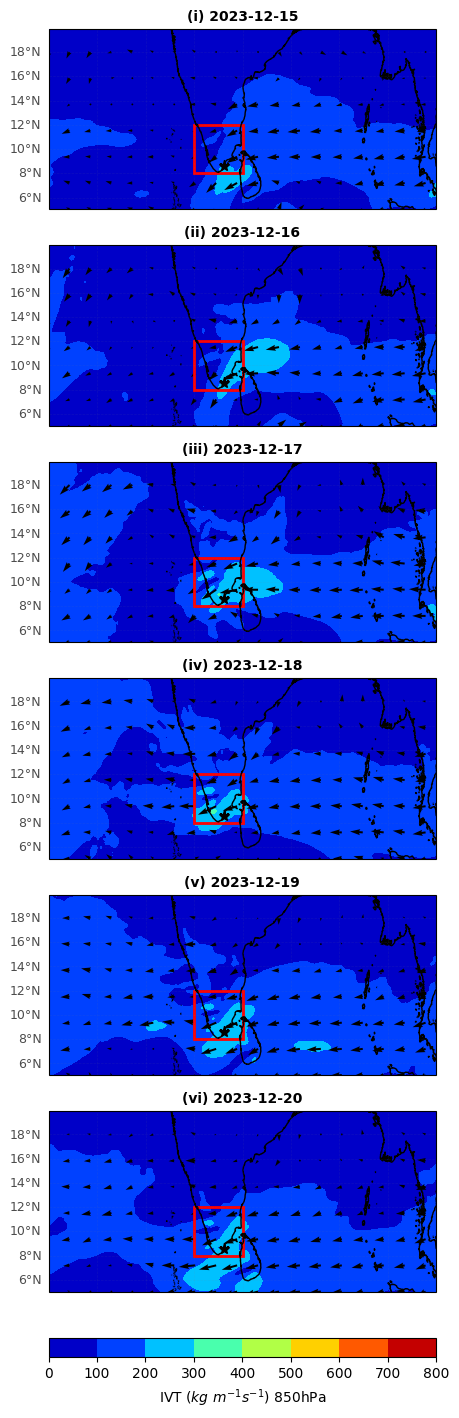

In [11]:


# Create a 2x3 grid of subplots
fig, axes = plt.subplots(6,1, figsize=(5,20), subplot_kw={'projection': ccrs.PlateCarree()})

# Flatten the axes array for easy indexing
#ax = axes.flatten()
labels=['i','ii','iii','iv','v','vi']
# Loop over the time range you want to plot
for idx, i in enumerate(range(15, 21)):
    time = f'2023-12-{i}'
    
    # Extract the relevant data for IVT and wind components (u and v)
    ivt_masked = date_data_1.isel(time=idx)['ivt']
    u_flux_masked = date_data_1.isel(time=idx)['u']
    v_flux_masked = date_data_1.isel(time=idx)['v']

    # Use the corresponding subplot axis
    ax = axes[idx]
    # Set up coastlines, land, and ocean features
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor='#F5F5DC')
    ax.add_feature(cfeature.OCEAN, facecolor='#E0FFFF')
    
    # Set aspect ratio
    ax.set_aspect('auto')  # Change to 'equal' if needed

    # Normalize and plot contours
    norm = np.arange(0,900,100)
    contour = ax.contourf(ivt_masked['longitude'], ivt_masked['latitude'], ivt_masked, 
                           cmap='jet', levels=norm, transform=ccrs.PlateCarree())

    # Add quivers for wind direction and strength
    quiver_stride = 18
    ax.quiver(u_flux_masked.longitude[::quiver_stride], u_flux_masked.latitude[::quiver_stride],
              u_flux_masked[::quiver_stride, ::quiver_stride], 
              v_flux_masked[::quiver_stride, ::quiver_stride],
              scale=300, color='black', transform=ccrs.PlateCarree())

    # Define coordinates and size for the square box
    lon_min, lon_max = 75, 80
    lat_min, lat_max = 8, 12
    box = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                    edgecolor='red', facecolor='none', linewidth=2, transform=ccrs.PlateCarree())
    ax.add_patch(box)

    # Add Kayalpattinam location
    longitude = 78.1238
    latitude = 8.5683
    ax.plot(longitude, latitude, 'black',marker='*', markersize=8, label='Kayalpattinam (8.568$\circ$N, 78.124$\circ$E)', transform=ccrs.PlateCarree())

    # Add gridlines
    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.1, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = False
    gl.left_labels = True

    # Apply opacity to y-axis labels
    gl.ylabel_style = {'fontsize': 9, 'alpha': 0.7}

    # Only show x-ticks on the last plot
    gl.xlabel_style = {'fontsize': 9, 'alpha': 0.7}

    # Title for each subplot
    ax.set_title(f'({labels[idx]}) {time}', fontsize=10, fontweight='bold')

# Add a common colorbar
cbar = fig.colorbar(contour, ax=axes, orientation='horizontal', 
                    label="IVT ($kg~m^{-1}s^{-1}$) 850hPa", pad=0.03)

# Adjust layout to fit colorbar
plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/IMDAA_IVT_850.png",dpi=300,bbox_inches='tight')


# 500 Hpa

In [12]:

height=500
# Process 'sph' data
q_path=sph_files[0]
u_path=u_files[0]
v_path=v_files[0]
# Read the specific humidity
sph_data = xr.open_dataset(q_path)
sph_data['time'] = pd.to_datetime(sph_data['time'].values)
# Selcting only specific pressure levels
q = (sph_data.sel(lev=slice(1001, height)).rename({"lev": "plevel"})['sph']).resample(time="D").mean()

# Process UGRD data (zonal wind component)
data = xr.open_dataset(u_path)
data_sorted = data.sortby('plevel', ascending=False)
u = data_sorted.sel(plevel=slice(1000,height)).isel(plevel=[0,1,3,5,6]).resample(time="D").mean()

# Process VGRD data (zonal wind component)
data = xr.open_dataset(v_path)
data_sorted = data.sortby('plevel', ascending=False)
v = data_sorted.sel(plevel=slice(1000,height)).isel(plevel=[0,1,3,5,6]).resample(time="D").mean() # adjust the p levels manually

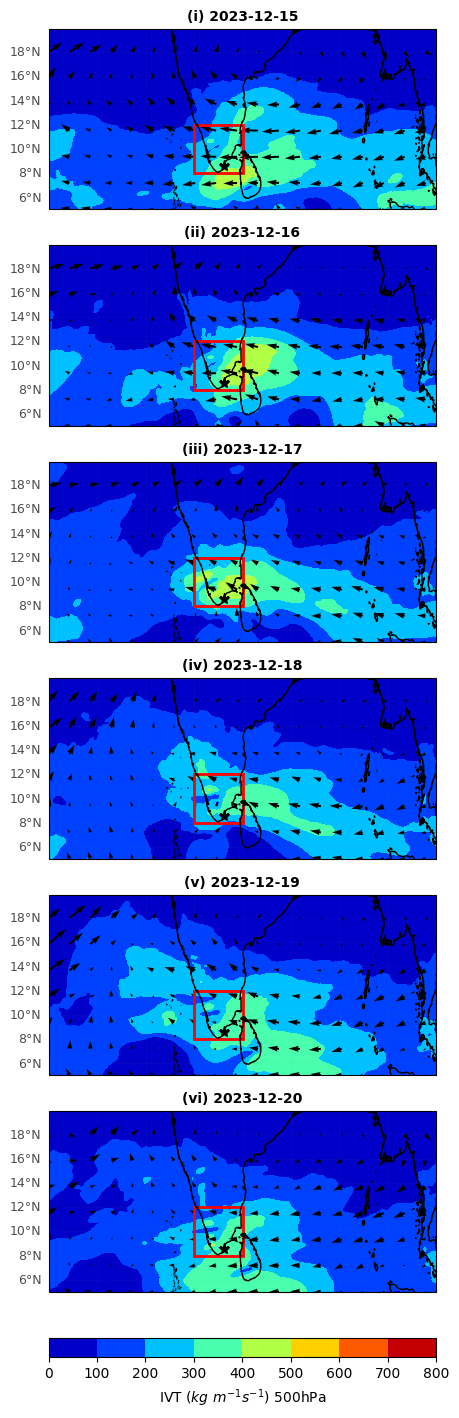

: 

In [ ]:

ivt,q1,u1,v1=IVT_calculation_IMDAA(q,u,v,height=height) # change the level to various levels required
# Extract the specific pressure level
u_flux=u1['UGRD_prl'].sel(plevel=height)
v_flux=v1['VGRD_prl'].sel(plevel=height)
# Reset the dataset for the specifc pressure level
date_data_1 = xr.Dataset(
    {
    "ivt": (("time",  "latitude", "longitude"), ivt.values),  # IVT in kg/m s
    "u": (("time",  "latitude", "longitude"), u_flux.values),  # Zonal wind in m/s
    "v": (("time",  "latitude", "longitude"), v_flux.values),  # Meridional wind in m/s
    },
    coords=ivt.coords)

# Set the Coordinates
min_lon, max_lon = 60,100
min_lat, max_lat = 5, 20

 #Selecting the parameters for the IVT
date_data_1 = date_data_1.sel(latitude=slice(min_lat, max_lat),
                    longitude=slice(min_lon, max_lon))


# Create a 2x3 grid of subplots
fig, axes = plt.subplots(6,1, figsize=(5,20), subplot_kw={'projection': ccrs.PlateCarree()})

# Flatten the axes array for easy indexing
#axes = axes.flatten()
labels=['i','ii','iii','iv','v','vi']
# Loop over the time range you want to plot
for idx, i in enumerate(range(15, 21)):
    time = f'2023-12-{i}'
    
    # Extract the relevant data for IVT and wind components (u and v)
    ivt_masked = date_data_1.isel(time=idx)['ivt']
    u_flux_masked = date_data_1.isel(time=idx)['u']
    v_flux_masked = date_data_1.isel(time=idx)['v']

    # Use the corresponding subplot axis
    ax = axes[idx]

    # Set up coastlines, land, and ocean features
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor='#F5F5DC')
    ax.add_feature(cfeature.OCEAN, facecolor='#E0FFFF')
    
    # Set aspect ratio
    ax.set_aspect('auto')  # Change to 'equal' if needed

    # Normalize and plot contours
    norm = np.arange(0,900,100)
    contour = ax.contourf(ivt_masked['longitude'], ivt_masked['latitude'], ivt_masked, 
                           cmap='jet', levels=norm, transform=ccrs.PlateCarree())

    # Add quivers for wind direction and strength
    quiver_stride = 18
    ax.quiver(u_flux_masked.longitude[::quiver_stride], u_flux_masked.latitude[::quiver_stride],
              u_flux_masked[::quiver_stride, ::quiver_stride], 
              v_flux_masked[::quiver_stride, ::quiver_stride],
              scale=300, color='black', transform=ccrs.PlateCarree())

    # Define coordinates and size for the square box
    lon_min, lon_max = 75, 80
    lat_min, lat_max = 8, 12
    box = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                    edgecolor='red', facecolor='none', linewidth=2, transform=ccrs.PlateCarree())
    ax.add_patch(box)

    # Add Kayalpattinam location
    longitude = 78.1238
    latitude = 8.5683
    ax.plot(longitude, latitude, 'black', marker="*", markersize=8, label='Kayalpattinam (8.568$\circ$N, 78.124$\circ$E)', transform=ccrs.PlateCarree())

    # Add gridlines
    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.1, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = False
    gl.left_labels = True

    # Apply opacity to y-axis labels
    gl.ylabel_style = {'fontsize': 9, 'alpha': 0.7}

    # Only show x-ticks on the last plot
    gl.xlabel_style = {'fontsize': 9, 'alpha': 0.7}

    # Title for each subplot
    ax.set_title(f'({labels[idx]}) {time}', fontsize=10, fontweight='bold')

# Add a common colorbar
cbar = fig.colorbar(contour, ax=axes, orientation='horizontal', 
                    label="IVT ($kg~m^{-1}s^{-1}$) 500hPa", pad=0.03)

# Adjust layout to fit colorbar
plt.savefig("C://Users/sreega/Desktop/Workstation/EPE_Kayalpattinam/Figures/IMDAA_IVT_500.png",dpi=300,bbox_inches='tight')


# Plot for Graphical Abstract


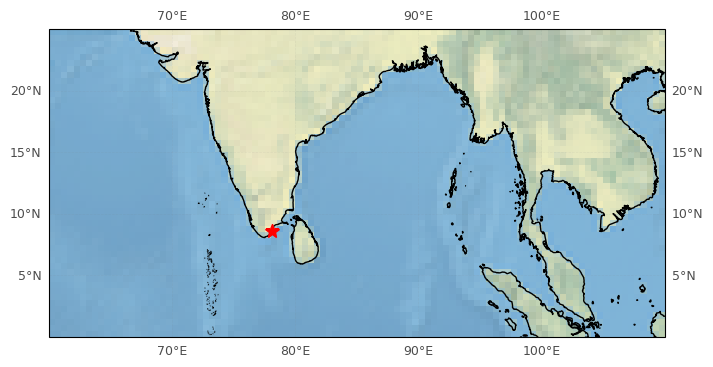

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# Create a 2x3 grid of subplots
fig, ax = plt.subplots(1, figsize=(12, 4), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([60,110,0,25], crs=ccrs.PlateCarree())
ax.stock_img()
# Set up coastlines, land, and ocean features
ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='#F5F5DC')
ax.add_feature(cfeature.OCEAN, facecolor='#E0FFFF')

# Add Kayalpattinam location
longitude = 78.1238
latitude = 8.5683
ax.plot(longitude, latitude, 'r*', markersize=10, 
        label='Kayalpattinam (8.568$\circ$N, 78.124$\circ$E)', transform=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.1, linestyle='--')
gl.top_labels = True
gl.right_labels = True
gl.bottom_labels = True
gl.left_labels = True
gl.ylabel_style = {'fontsize': 9, 'alpha': 0.7}
gl.xlabel_style = {'fontsize': 9, 'alpha': 0.7}

# Adjust layout
fig.subplots_adjust(right=0.85, hspace=0.3, wspace=0.2)

plt.show()
